In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
spal = sns.diverging_palette(245, 64, s=87, l=84)

In [20]:
df = pd.read_csv('../../figs/fig_tabular_data/aggregate_results.csv')
del df['Unnamed: 0']
df.columns = ['NRMSE', 'SSIM', 'CW-SSIM', 'GMS', 'Drift Class', 'Swath', 'Winters Compared']
df.replace({'clpx_swale': "Other", 'clpx_watertracks_creek': 'Water track',
            'hv_lake': 'Lake', 'clpx_outcrops': 'Outcrop',
            'clpx_lake_e': 'Lake', 'hv_polygon_cracks': 'Ice Wedge',
            'hv_stream': 'Stream', 'hv_watertrack': 'Water track',}, inplace=True)
df.head()

,NRMSE,SSIM,CW-SSIM,GMS,Drift Class,Swath,Winters Compared
0,0.691,0.818322,0.8015,0.842,Other,CLPX,2015 v. 2018
1,0.716,0.893100,0.7695,0.867,Other,CLPX,2013 v. 2018
2,0.706,0.893446,0.8040,0.869,Other,CLPX,2012 v. 2018
3,0.760,0.880182,0.8340,0.865,Other,CLPX,2017 v. 2018
4,0.709,0.859140,0.7910,0.863,Other,CLPX,2016 v. 2018


In [21]:
df['Drift Class'].unique()

array(['Other', 'Water track', 'Lake', 'Outcrop', 'Ice Wedge', 'Stream'],
      dtype=object)

In [22]:
df['Avg. Similarity Score'] = df[['NRMSE', 'SSIM',
                                   'CW-SSIM', 'GMS']].mean(axis=1)
df['Swath and Drift Class'] = df['Swath'] + ' ' + df['Drift Class']
df['Avg. Similarity Score'].mean()

0.7998504458002267

In [27]:
df.groupby(['Swath']).mean().round(2)

,NRMSE,SSIM,CW-SSIM,GMS,Avg. Similarity Score
Swath,,,,,
CLPX,0.61,0.82,0.82,0.85,0.77
Happy Valley,0.71,0.87,0.85,0.87,0.83


In [26]:
df.groupby(['Swath and Drift Class']).mean()

,NRMSE,SSIM,CW-SSIM,GMS,Avg. Similarity Score
Swath and Drift Class,,,,,
CLPX Lake,0.433867,0.690356,0.808400,0.844267,0.694222
CLPX Other,0.705600,0.868216,0.801333,0.861800,0.809237
CLPX Outcrop,0.571467,0.837712,0.853700,0.840000,0.775720
CLPX Water track,0.713933,0.872099,0.811567,0.870600,0.817050
Happy Valley Ice Wedge,0.749133,0.907330,0.838867,0.884067,0.844849
Happy Valley Lake,0.687133,0.865982,0.851433,0.863267,0.816954
Happy Valley Stream,0.737933,0.866341,0.817733,0.863667,0.821419
Happy Valley Water track,0.676000,0.850011,0.891733,0.859667,0.819353


In [99]:
# add ranks
rdf = df.copy()
rdf['NRMSE Rank'] = rdf.NRMSE.rank(pct=True).round(3) * 100
rdf['SSIM Rank'] = rdf.SSIM.rank(pct=True).round(3) * 100
rdf['CW-SSIM Rank'] = rdf['CW-SSIM'].rank(pct=True).round(3) * 100
rdf['GMS Rank'] = rdf.GMS.rank(pct=True).round(3) * 100
rdf['Avg. Similarity Rank'] = rdf[['NRMSE Rank', 'SSIM Rank',
                                   'CW-SSIM Rank', 'GMS Rank']].mean(axis=1)
rdf['Field Area and Drift Class'] = rdf['Field Area'] + ' ' + rdf['Drift Class']

rdf.head()
# box plot?
# heatmap from rank??

,NRMSE,SSIM,CW-SSIM,GMS,Drift Class,Field Area,Winters Compared,NRMSE Rank,SSIM Rank,CW-SSIM Rank,GMS Rank,Avg. Similarity Rank,Field Area and Drift Class
0,0.691,0.818322,0.8015,0.842,Other,CLPX,2015 v. 2018,50.8,22.5,21.2,21.7,29.050,CLPX Other
1,0.716,0.893100,0.7695,0.867,Other,CLPX,2013 v. 2018,58.3,75.8,1.7,62.1,49.475,CLPX Other
2,0.706,0.893446,0.8040,0.869,Other,CLPX,2012 v. 2018,54.2,77.5,24.6,67.1,55.850,CLPX Other
3,0.760,0.880182,0.8340,0.865,Other,CLPX,2017 v. 2018,73.8,70.0,56.2,59.6,64.900,CLPX Other
4,0.709,0.859140,0.7910,0.863,Other,CLPX,2016 v. 2018,56.7,50.8,10.0,54.2,42.925,CLPX Other


In [101]:
mean_ranks = rdf.pivot("Field Area and Drift Class", "Winters Compared", "Avg. Similarity Rank")

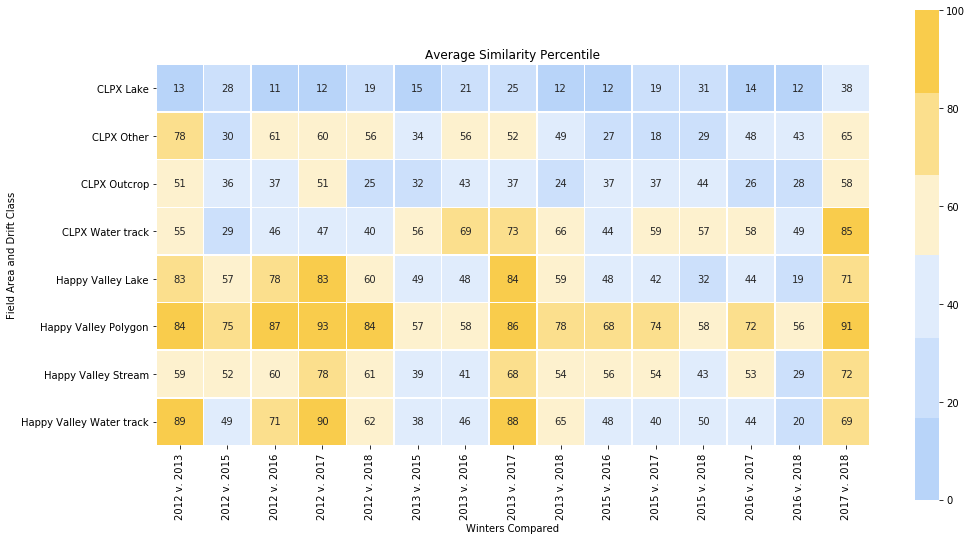

In [119]:
#plt.figure(figsize=(16,8))

fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(mean_ranks, ax=ax, annot=True, square=True,
            cmap=spal, center=50, vmin=0, vmax=100,
            linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title("Average Similarity Percentile")
plt.savefig('../../figs/pngs/similarity_heatmap.png',
            dpi=300, bbox_inches='tight')

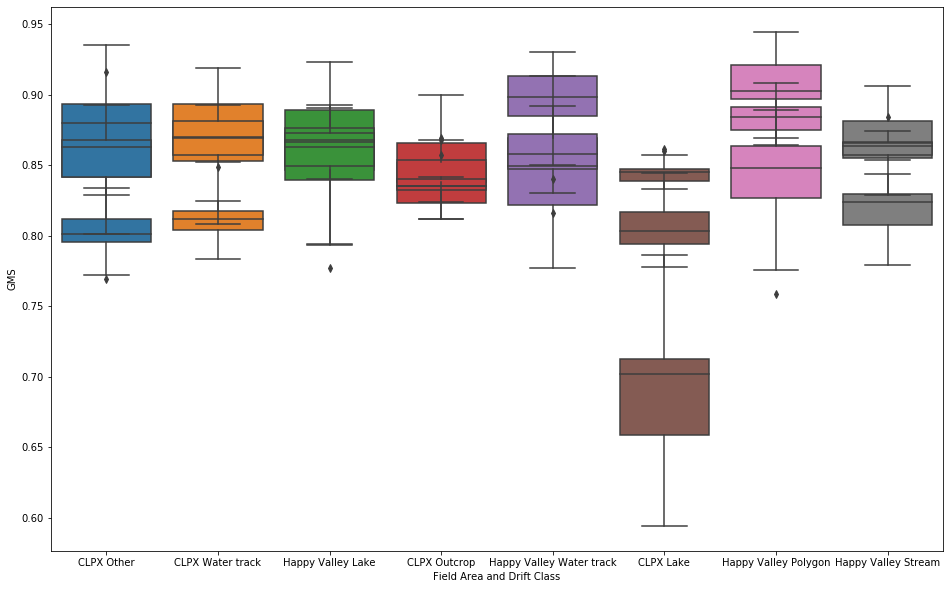

In [122]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.boxplot(x='Field Area and Drift Class', y='SSIM', data=rdf, ax=ax)
sns.boxplot(x='Field Area and Drift Class', y='CW-SSIM', data=rdf, ax=ax)
sns.boxplot(x='Field Area and Drift Class', y='GMS', data=rdf, ax=ax)